# Multi-Class SVM Strategies: 2D Fisher Iris Data
Import libraries and data set.

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

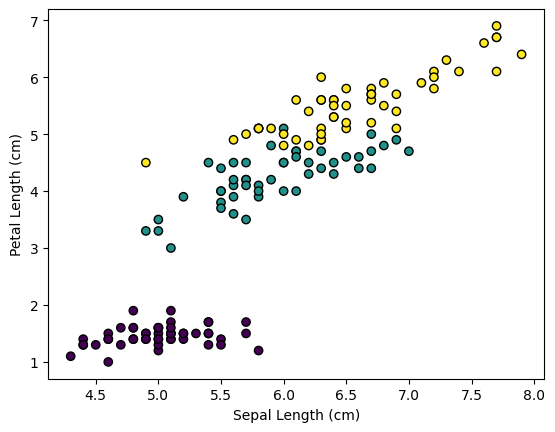

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.inspection import DecisionBoundaryDisplay

# View the data set as dataframe
iris = load_iris(as_frame=True)
print(iris.frame)

# Get only the sepal length and petal length
X, y = iris.data.to_numpy(), iris.target
X = X[:,[0,2]]

# Visualize 2D data
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()

## Fit an SVM with OvO strategy

accuracy = 0.96
Confusion Matrix
[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


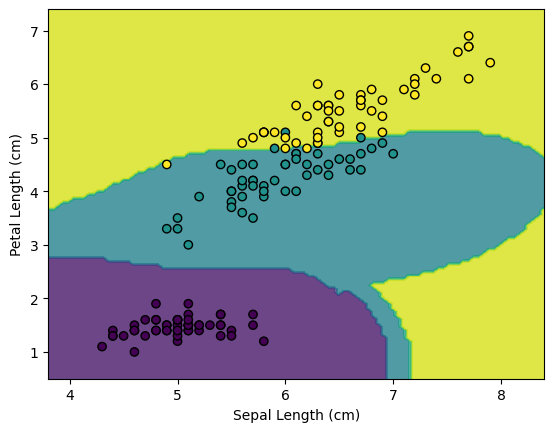

In [2]:
svm_ovo = OneVsOneClassifier(make_pipeline(StandardScaler(), SVC())).fit(X,y)
print(f"accuracy = {svm_ovo.score(X, y)}")
print('Confusion Matrix')
print(confusion_matrix(y, svm_ovo.predict(X)))
DecisionBoundaryDisplay.from_estimator(svm_ovo, X, alpha=0.8, eps=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()

## Fit an SVM with OvR strategy

accuracy = 0.96
Confusion Matrix
[[50  0  0]
 [ 0 48  2]
 [ 0  4 46]]


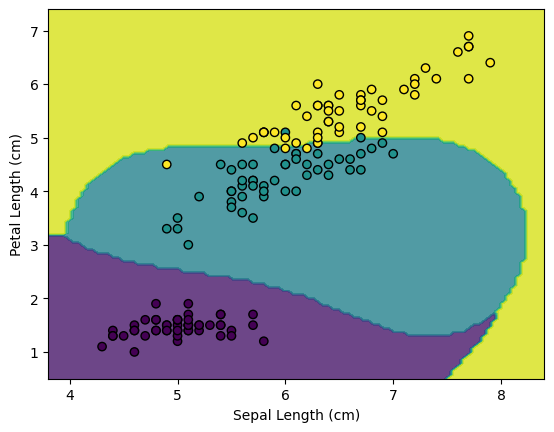

In [3]:
svm_ovr = OneVsRestClassifier(make_pipeline(StandardScaler(), SVC())).fit(X,y)
print(f"accuracy = {svm_ovr.score(X, y)}")
print('Confusion Matrix')
print(confusion_matrix(y, svm_ovr.predict(X)))
DecisionBoundaryDisplay.from_estimator(svm_ovr, X, alpha=0.8, eps=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()

## Fit an SVM with ECOC strategy

accuracy = 0.96
Confusion Matrix
[[50  0  0]
 [ 0 48  2]
 [ 0  4 46]]


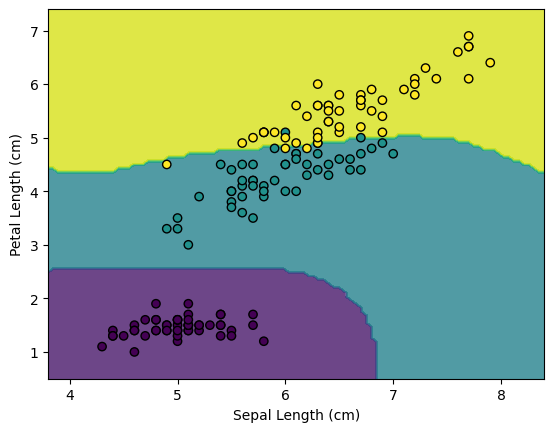

In [4]:
# Code_size is the percentage of n_classes to be used as length of codeword.
# Here, we have code_size=3, hence the codewords have length 3*3 = 9.
# This means that 9 binary classifiers will be trained.

svm_ecoc = OutputCodeClassifier(make_pipeline(StandardScaler(), SVC()),
                                code_size=3).fit(X,y)
print(f"accuracy = {svm_ecoc.score(X, y)}")
print('Confusion Matrix')
print(confusion_matrix(y, svm_ecoc.predict(X)))
DecisionBoundaryDisplay.from_estimator(svm_ecoc, X, alpha=0.8, eps=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()